# **Задание**

**Анализ продаж сети кофеен**

К нам обратился владелец небольшой сети кофеен, который планирует расширить
свой бизнес и открыть несколько новых точек в течение ближайших 4 месяцев. В
связи с этим он хотел бы понять, как распределяются продажи по существующей
сети кофеен, какие виды продукции вносят наибольший вклад в объем продаж, а
от каких, возможно, стоит отказаться, кто является основным клиентом сети.
Заказчиком были предоставлены датасеты с выгрузкой о транзакциях и клиентах
из его CRM-системы.
Проанализируйте полученные данные и представьте аналитический отчет,
содержащий выводы и рекомендации для Заказчика, которые помогут ему для
решения его бизнес-задач.

# **Карточка проекта**

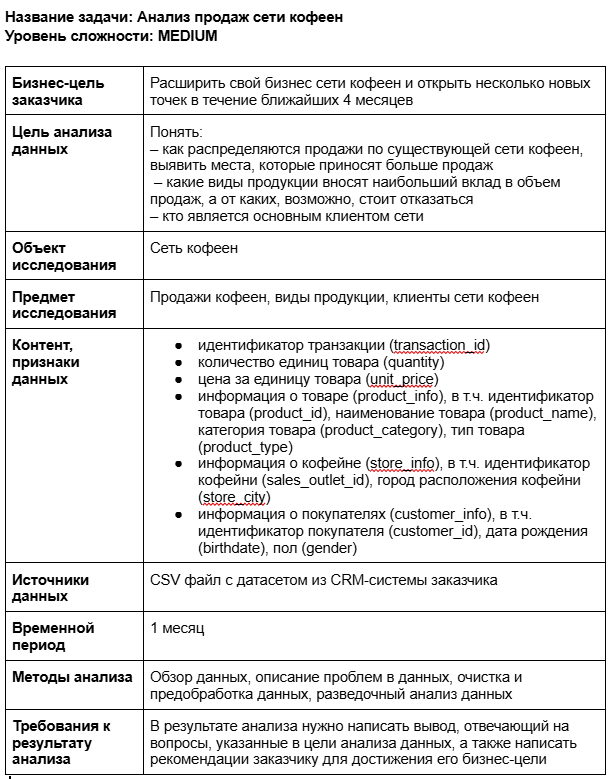

#**Подключение библиотек и загрузка файла**

Подключаем библиотеки для анализа данных, для вычислений, для парсинга json формата, для визуализации и для подгрузки файлов с ПК.

In [ ]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
!pip install --upgrade gdown

In [ ]:
uploaded = files.upload()

Saving coffee_shop_hard.csv to coffee_shop_hard.csv


#**Обзор данных**

##Обзор и описание данных

Читаем датасет

In [ ]:
df = pd.read_csv('coffee_shop_hard.csv')

Смотрим первые записи

In [ ]:
df.head(10)

,transaction_id,quantity,unit_price,product_info,store_info,customer_info
0,0,1,162.50,"{""product_id"":52,""product_name"":""Traditional B...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":558,""birthdate"":""1983-02-25"",""g..."
1,1,2,227.50,"{""product_id"":27,""product_name"":""Brazilian Lg""...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":781,""birthdate"":""1991-07-29"",""g..."
2,2,2,162.50,"{""product_id"":46,""product_name"":""Serenity Gree...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":788,""birthdate"":""1995-02-23"",""g..."
3,3,2,162.50,"{""product_id"":23,""product_name"":""Our Old Time ...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":683,""birthdate"":""1999-02-06"",""g..."
4,4,1,159.25,"{""product_id"":34,""product_name"":""Jamaican Coff...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":99,""birthdate"":""1967-01-29"",""ge..."
5,5,1,195.00,"{""product_id"":32,""product_name"":""Ethiopia Rg"",...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":664,""birthdate"":""1996-09-04"",""g..."
6,6,2,195.00,"{""product_id"":49,""product_name"":""English Break...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":316,""birthdate"":""1952-04-11"",""g..."
7,7,1,243.75,"{""product_id"":60,""product_name"":""Sustainably G...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":38,""birthdate"":""1956-09-13"",""ge..."
8,8,2,195.00,"{""product_id"":51,""product_name"":""Earl Grey Lg""...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":370,""birthdate"":""1959-03-03"",""g..."
9,9,2,195.00,"{""product_id"":49,""product_name"":""English Break...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":180,""birthdate"":""1980-11-09"",""g..."


Смотрим информацию о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24909 entries, 0 to 24908
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  24909 non-null  int64  
 1   quantity        24909 non-null  int64  
 2   unit_price      24909 non-null  float64
 3   product_info    24909 non-null  object 
 4   store_info      24909 non-null  object 
 5   customer_info   24909 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(24909, 6)

##Вывод

**Вывод:**
Всего в начальном датасете 24909 записей (строк) и 6 колонок (признаков).
Признаки:
- transaction_id - порядковый признак, показывает id транзакции покупки
- quantity - количественный дискретный признак, показывает количество купленного товара
- unit_price -  количественный непрерывный признак, показывает стоимость одной единицы товара
- product_info - структурированный признак, представлен в json формате, показывает информацию о продукте, а именно: id продукта (количественный дискретный признак), название продукта (качественный признак), категорию продукта (категориальный признак)
- store_info - структурированный признак, представлен в json формате, показывает информацию о кофейне, а именно: id кофейни (количественный дискретный признак) и город расположения кофейни (качественный признак)
- customer_info - структурированный признак, представлен в json формате, показывает информацию о покупателе, а именно: id покупателя (количественный дискретный признак), дату рождения, пол (категориальный признак)

Пропущенных значений в каждом из признаков нет.

##Выявление проблем

1. Проверить дубликаты.
2. Признак product_info представлен в json формате. Его нужно распаковать на отдельные признаки, признак product_id следует удалить.
3. Признак store_info представлен в json формате. Его нужно распаковать на отдельные признаки.
4. Признак customer_info представлен в json формате. Его нужно распаковать на отдельные признаки.
5. Нет признака Возраст клиента, его нужно будет добавить. В таком случае, признак birthdate после можно будет удалить.
6. Нет признака Итоговая сумма покупки, его нужно добавить.
7. Возможно, один и тот же город написан в разных регистрах или на разных языках. Это нужно проверить и исправить при наличии проблемы.
8. Возможно, один и тот же пол написан в разных регистрах или на разных языках. Это нужно проверить и исправить при наличии проблемы.
9. Возможно есть еще какие-то проблемы, которые выявить на данном этапе не возможно. Их можно будет выявить на этапе предобработки данных.

#**Очистка и предобработка данных**

In [ ]:
#создаем копию датасета
df_copy = df.copy()

##Удаление дубликатов



Всего в датасете 24909 записей. Каждая уникальная запись будет иметь свое значение признака transaction_id.

Посмотрим сколько уникальных номеров транзакций есть в датасете. Ведь сколько уникальных номеров транзакций - столько и уникальных записей.

In [ ]:
len((df_copy['transaction_id'].unique()))

24852

Всего уникальных транзакций - 24852, а всего записей 24909. Значит есть дубликаты, которые нам надо удалить.

Посмотрим на записи-дубликаты

In [ ]:
df_copy[df_copy.duplicated()==True]

,transaction_id,quantity,unit_price,product_info,store_info,customer_info
24852,2556,1,195.00,"{""product_id"":26,""product_name"":""Brazilian Rg""...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5018,""birthdate"":""1952-07-03"",""..."
24853,21986,2,162.50,"{""product_id"":48,""product_name"":""English Break...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":136,""birthdate"":""1973-05-16"",""g..."
24854,16488,1,162.50,"{""product_id"":54,""product_name"":""Morning Sunri...","{""sales_outlet_id"":8,""store_city"":""Moscow""}","{""customer_id"":8349,""birthdate"":""2000-12-31"",""..."
24855,42306,3,162.50,"{""product_id"":23,""product_name"":""Our Old Time ...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5600,""birthdate"":""1975-01-17"",""..."
24856,37086,3,195.00,"{""product_id"":53,""product_name"":""Traditional B...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5224,""birthdate"":""1994-03-08"",""..."
24857,5890,2,162.50,"{""product_id"":52,""product_name"":""Traditional B...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5081,""birthdate"":""1992-11-26"",""..."
24858,983,2,243.75,"{""product_id"":38,""product_name"":""Latte"",""produ...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5940,""birthdate"":""1965-11-21"",""..."
24859,1757,1,162.50,"{""product_id"":50,""product_name"":""Earl Grey Rg""...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":504,""birthdate"":""1976-04-06"",""g..."
24860,41388,1,292.50,"{""product_id"":78,""product_name"":""Scottish Crea...","{""sales_outlet_id"":8,""store_city"":""Moscow""}","{""customer_id"":8174,""birthdate"":""1957-05-12"",""..."
24861,986,1,162.50,"{""product_id"":44,""product_name"":""Peppermint Rg...","{""sales_outlet_id"":5,""store_city"":""Москва""}","{""customer_id"":5473,""birthdate"":""1959-04-23"",""..."


Удалим дубликаты

In [ ]:
df_copy.drop_duplicates(inplace=True)

Посмотрим на то, сколько осталось записей

In [ ]:
df_copy.shape[0]

24852

Теперь записей столько же, сколько и уникальных транзакций

##Распаковка признака product_info

In [ ]:
#смотрим что находится в ячейке признака
df_copy['product_info'][0]

'{"product_id":52,"product_name":"Traditional Blend Chai Rg","product_category":"Tea"}'

### Получение признака product_name

In [ ]:
#создаем функцию, которая будет выбирать название продукта из json
def get_product_name (product_info : str) -> str:
  try:
    return eval(product_info)['product_name']
  except:
    return "Нет данных"

In [ ]:
#создаем новый признак - название продукта
df_copy['product_name'] = df_copy['product_info'].apply(get_product_name)

Смотрим какие значения получились в результате создания нового признака. В итоге, видим, что во всех записях было указано название продукта, и значения "Нет данных" не появилось.

In [ ]:
df_copy['product_name'].unique()

array(['Traditional Blend Chai Rg', 'Brazilian Lg',
       'Serenity Green Tea Rg', 'Our Old Time Diner Blend Rg',
       'Jamaican Coffee River Sm', 'Ethiopia Rg', 'English Breakfast Lg',
       'Sustainably Grown Organic Rg', 'Earl Grey Lg',
       'Jamaican Coffee River Rg', 'Serenity Green Tea Lg',
       'Brazilian Sm', 'English Breakfast Rg',
       'Traditional Blend Chai Lg', 'Cappuccino', 'Espresso shot',
       'Cappuccino Lg', 'Latte', 'Earl Grey Rg', 'Dark chocolate Lg',
       'Columbian Medium Roast Sm', 'Oatmeal Scone',
       'Morning Sunrise Chai Lg', 'Morning Sunrise Chai Rg',
       'Peppermint Lg', 'Jumbo Savory Scone', 'Lemon Grass Lg',
       'Sustainably Grown Organic Lg', 'Dark chocolate Rg',
       'Lemon Grass Rg', 'Ethiopia Sm', 'Latte Rg',
       'Our Old Time Diner Blend Sm', 'Chocolate Chip Biscotti',
       'Columbian Medium Roast Rg', 'Ethiopia Lg', 'Brazilian Rg',
       'Columbian Medium Roast Lg', 'Spicy Eye Opener Chai Rg',
       'Ginger Biscotti', 

### Получение признака product_category

In [ ]:
#создаем функцмию для получния признака категории продукции из json
def get_product_category(product_info : str) -> str:
  try:
    return eval(product_info)['product_category']
  except:
    return "Нет данных"

In [ ]:
#создаем новый признак
df_copy['product_category'] = df_copy['product_info'].apply(get_product_category)

Смотрим какие значения получились в результате создания нового признака. В итоге, видим, что во всех записях было указано название категории продукта, и значения "Нет данных" не появилось.

In [ ]:
df_copy['product_category'].unique()

array(['Tea', 'Coffee', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Coffee beans', 'Loose Tea', 'Packaged Chocolate', 'Branded'],
      dtype=object)

Теперь удалим признак product_info, потому что все необходимые признаки, которые он включал мы добавили к датасету

In [ ]:
df_copy.drop(columns='product_info', inplace=True)

In [ ]:
df_copy.head()

,transaction_id,quantity,unit_price,store_info,customer_info,product_name,product_category
0,0,1,162.50,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":558,""birthdate"":""1983-02-25"",""g...",Traditional Blend Chai Rg,Tea
1,1,2,227.50,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":781,""birthdate"":""1991-07-29"",""g...",Brazilian Lg,Coffee
2,2,2,162.50,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":788,""birthdate"":""1995-02-23"",""g...",Serenity Green Tea Rg,Tea
3,3,2,162.50,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":683,""birthdate"":""1999-02-06"",""g...",Our Old Time Diner Blend Rg,Coffee
4,4,1,159.25,"{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":99,""birthdate"":""1967-01-29"",""ge...",Jamaican Coffee River Sm,Coffee


##Распаковка признака store_info

In [ ]:
#посмотрим что нахоится в ячейке признака
df_copy['store_info'][0]

'{"sales_outlet_id":3,"store_city":"Санкт-Петербург"}'

###Получение признака sales_outlet_id


In [ ]:
#функция для получения признака id отдельной кофейни из json
def get_sales_outlet_id(store_info : str)-> int:
  try:
    return eval(store_info)['sales_outlet_id']
  except:
    return -1

In [ ]:
#создаем новый признак - id отдельной кофейни
df_copy['sales_outlet_id'] = df_copy['store_info'].apply(get_sales_outlet_id)

Смотрим какие значения получились в результате создания нового признака. В итоге, видим, что во всех записях был указан id кофейни, и значения -1 не появилось.

Также мы поняли, что у заказчика етсь только три кофейни

In [ ]:
df_copy['sales_outlet_id'].unique()

array([3, 5, 8])

###Получение признака store_city

In [ ]:
#функция для получения города из json
def get_store_city(store_info : str)-> str:
  try:
    return eval(store_info)['store_city']
  except:
    return "Нет данных"

In [ ]:
#получаем новый признак - город расположения кофеен
df_copy['store_city']=df_copy['store_info'].apply(get_store_city)

In [ ]:
df_copy['store_city'].unique()

array(['Санкт-Петербург', 'Москва', 'Moscow'], dtype=object)

Мы видим, что во всех значениях признака store_info присутствовал город. Но также у нас есть значения признака Город: "Москва" и "Moscow" - это два разных значения в датасете, но должно быть одно, которое обозначало бы город Москва.

Приведем эти два значения к одному - "Москва".

Также удалим признак store_info, ведь он нам теперь не нужен, т.к. мы распаковали его в отдельные признаки.

In [ ]:
#удаляем признак store_info
df_copy.drop(columns='store_info', inplace=True)

In [ ]:
df_copy['store_city'] = df_copy['store_city'].replace('Moscow', 'Москва')

In [ ]:
df_copy['store_city'].unique()

array(['Санкт-Петербург', 'Москва'], dtype=object)

In [ ]:
df_copy.head()

,transaction_id,quantity,unit_price,customer_info,product_name,product_category,sales_outlet_id,store_city
0,0,1,162.50,"{""customer_id"":558,""birthdate"":""1983-02-25"",""g...",Traditional Blend Chai Rg,Tea,3,Санкт-Петербург
1,1,2,227.50,"{""customer_id"":781,""birthdate"":""1991-07-29"",""g...",Brazilian Lg,Coffee,3,Санкт-Петербург
2,2,2,162.50,"{""customer_id"":788,""birthdate"":""1995-02-23"",""g...",Serenity Green Tea Rg,Tea,3,Санкт-Петербург
3,3,2,162.50,"{""customer_id"":683,""birthdate"":""1999-02-06"",""g...",Our Old Time Diner Blend Rg,Coffee,3,Санкт-Петербург
4,4,1,159.25,"{""customer_id"":99,""birthdate"":""1967-01-29"",""ge...",Jamaican Coffee River Sm,Coffee,3,Санкт-Петербург


##Распаковка признака customer_info

In [ ]:
df_copy['customer_info'][0]

'{"customer_id":558,"birthdate":"1983-02-25","gender":"женский"}'

###Вычисление признака age

In [ ]:
#импортируем библиотеку для работы с датами
from datetime import datetime

In [ ]:
#функция для вычисления возраста клиента
def get_age(customer_info:str)->int:
  try:
    birthdate_str = eval(customer_info)['birthdate']
    birthdate = datetime.strptime(birthdate_str, '%Y-%m-%d')
    return round((datetime.now() - birthdate).days / 365)
  except:
    return -1

In [ ]:
df_copy['customer_age'] =  df_copy['customer_info'].apply(get_age)

In [ ]:
df_copy['customer_age'].unique()

array([42, 34, 30, 26, 58, 29, 73, 69, 66, 45, 38, 50, 53, 37, 49, 64, 60,
       61, 46, 56, 43, 75, 36, 70, 54, 47, 48, 72, 32, 68, 62, 71, 41, 51,
       39, 52, 67, 65, 35, 31, 55, 44, 63, 40, 27, 57, 59, 25, 33, 74, 24,
       28])

Мы вычислили новый признак - возраст клиента. Также заметим, что в признаке customer_info во всех значениях была дата рождения клиента.

### Получение признака gender

In [ ]:
#функция для получения признака пол клиента из json
def get_gender(customer_info:str)->str:
  try:
    return eval(customer_info)['gender']
  except:
    return "Нет данных"

In [ ]:
df_copy['customer_gender'] = df_copy['customer_info'].apply(get_gender)

In [ ]:
df_copy['customer_gender'].unique()

array(['женский', 'не указан', 'мужской'], dtype=object)

###Получение признака customer_id

In [ ]:
#функция для получения id клиента
def get_customer_id(customer_info : str) -> int:
  try:
    return eval(customer_info)['customer_id']
  except:
    return -1

In [ ]:
df_copy['customer_id']=df_copy['customer_info'].apply(get_customer_id)

In [ ]:
df_copy['customer_id'].unique()

array([ 558,  781,  788, ..., 5759, 5551, 5668])

Мы выделили все необходимые признаки из признака customer_info и можем его удалить.

In [ ]:
df_copy.drop(columns='customer_info', inplace=True)

Мы видим, что в признаке customer_info во всех знаечниях присутствовал пол клиента. Но где-то он имел значение "не указан". Посмотрим сколько таких записей.

In [ ]:
df_copy[df_copy['customer_gender']=='не указан'].shape[0]

5779

Мы видим, что таких значений аж 5790 - это довольно много, значит нельзя удалять такие записи, мы их оставим.

Посмотрим теперь на датасет после распаковки признаков

In [ ]:
df_copy.head(10)

,transaction_id,quantity,unit_price,product_name,product_category,sales_outlet_id,store_city,customer_age,customer_gender,customer_id
0,0,1,162.50,Traditional Blend Chai Rg,Tea,3,Санкт-Петербург,42,женский,558
1,1,2,227.50,Brazilian Lg,Coffee,3,Санкт-Петербург,34,не указан,781
2,2,2,162.50,Serenity Green Tea Rg,Tea,3,Санкт-Петербург,30,не указан,788
3,3,2,162.50,Our Old Time Diner Blend Rg,Coffee,3,Санкт-Петербург,26,женский,683
4,4,1,159.25,Jamaican Coffee River Sm,Coffee,3,Санкт-Петербург,58,мужской,99
5,5,1,195.00,Ethiopia Rg,Coffee,3,Санкт-Петербург,29,женский,664
6,6,2,195.00,English Breakfast Lg,Tea,3,Санкт-Петербург,73,женский,316
7,7,1,243.75,Sustainably Grown Organic Rg,Drinking Chocolate,3,Санкт-Петербург,69,мужской,38
8,8,2,195.00,Earl Grey Lg,Tea,3,Санкт-Петербург,66,женский,370
9,9,2,195.00,English Breakfast Lg,Tea,3,Санкт-Петербург,45,мужской,180


##Проверка признаков quantity,	unit_price и transaction_id

Проверим признаки quantity и unit_price, посмотрим какие у них есть значения.

###quantity

In [ ]:
df_copy['quantity'].unique()

array([1, 2, 4, 3, 8])

Видим, что каких-то ошибочных данных тут нет. Но проверим что покупали в количестве 8 штук.

In [ ]:
df_copy[df_copy['quantity']==8]

,transaction_id,quantity,unit_price,product_name,product_category,sales_outlet_id,store_city,customer_age,customer_gender,customer_id
17743,28980,8,2925.0,Civet Cat,Coffee beans,8,Москва,58,женский,8311


Тут всего одна запись, что покупка была, вероятно, 8 пачек кофейных зерен. Это адекватное значение.

###unit_price

In [ ]:
df_copy['unit_price'].unique()

array([ 162.5 ,  227.5 ,  159.25,  195.  ,  243.75,  201.5 ,  143.  ,
        276.25,  292.5 ,  130.  ,  260.  ,  308.75,  165.75,  211.25,
         52.  , 1495.  ,  581.75, 1820.  , 1170.  , 1283.75,  780.  ,
        711.75,  416.  ,  650.  , 1329.25,  866.45,  958.75, 1365.  ,
        975.  ,  910.  , 2925.  ,  617.5 ,  601.25, 1462.5 ,  494.  ,
        263.9 ,  365.95,  284.7 ,  304.85,  136.5 ,  172.25])

Тут все знаечния адекватные и нет ошибок

###transaction_id

На первый взгляд, признак transaction_id дублирует index, проверим это. Если это так то признак transaction_id можно было бы удалить.

Посмотрим, есть ли записи, где номер транзакции и номер записи не совпадают

In [ ]:
df_copy[df_copy['transaction_id']!=df_copy['transaction_id'].index]

,transaction_id,quantity,unit_price,product_name,product_category,sales_outlet_id,store_city,customer_age,customer_gender,customer_id
3854,3856,1,243.75,Cappuccino,Coffee,3,Санкт-Петербург,39,мужской,214
3855,3857,1,227.50,Dark chocolate Rg,Drinking Chocolate,3,Санкт-Петербург,57,мужской,110
3856,3858,1,243.75,Jumbo Savory Scone,Bakery,3,Санкт-Петербург,57,мужской,110
3857,3859,2,243.75,Sustainably Grown Organic Rg,Drinking Chocolate,3,Санкт-Петербург,63,не указан,725
3858,3860,2,195.00,Earl Grey Lg,Tea,3,Санкт-Петербург,61,мужской,82
...,...,...,...,...,...,...,...,...,...,...
24847,49882,1,276.25,Cappuccino Lg,Coffee,8,Москва,63,мужской,8026
24848,49888,1,136.50,Ouro Brasileiro shot,Coffee,8,Москва,71,мужской,8401
24849,49890,2,143.00,Brazilian Sm,Coffee,8,Москва,72,мужской,8412
24850,49892,2,162.50,Peppermint Rg,Tea,8,Москва,31,женский,8030


Таких записей очень много, значит удалять признак transaction_id не нужно.

##Добавление признака total

Чтобы считать общую прибыть кофеен, нужно посчитать конечную сумму каждой покупки в кофейнях

In [ ]:
df_copy.head()

,transaction_id,quantity,unit_price,product_name,product_category,sales_outlet_id,store_city,customer_age,customer_gender,customer_id
0,0,1,162.50,Traditional Blend Chai Rg,Tea,3,Санкт-Петербург,42,женский,558
1,1,2,227.50,Brazilian Lg,Coffee,3,Санкт-Петербург,34,не указан,781
2,2,2,162.50,Serenity Green Tea Rg,Tea,3,Санкт-Петербург,30,не указан,788
3,3,2,162.50,Our Old Time Diner Blend Rg,Coffee,3,Санкт-Петербург,26,женский,683
4,4,1,159.25,Jamaican Coffee River Sm,Coffee,3,Санкт-Петербург,58,мужской,99


In [ ]:
df_copy['total']=df_copy['unit_price']*df_copy['quantity']

In [ ]:
df_copy.head(10)

,transaction_id,quantity,unit_price,product_name,product_category,sales_outlet_id,store_city,customer_age,customer_gender,customer_id,total
0,0,1,162.50,Traditional Blend Chai Rg,Tea,3,Санкт-Петербург,42,женский,558,162.50
1,1,2,227.50,Brazilian Lg,Coffee,3,Санкт-Петербург,34,не указан,781,455.00
2,2,2,162.50,Serenity Green Tea Rg,Tea,3,Санкт-Петербург,30,не указан,788,325.00
3,3,2,162.50,Our Old Time Diner Blend Rg,Coffee,3,Санкт-Петербург,26,женский,683,325.00
4,4,1,159.25,Jamaican Coffee River Sm,Coffee,3,Санкт-Петербург,58,мужской,99,159.25
5,5,1,195.00,Ethiopia Rg,Coffee,3,Санкт-Петербург,29,женский,664,195.00
6,6,2,195.00,English Breakfast Lg,Tea,3,Санкт-Петербург,73,женский,316,390.00
7,7,1,243.75,Sustainably Grown Organic Rg,Drinking Chocolate,3,Санкт-Петербург,69,мужской,38,243.75
8,8,2,195.00,Earl Grey Lg,Tea,3,Санкт-Петербург,66,женский,370,390.00
9,9,2,195.00,English Breakfast Lg,Tea,3,Санкт-Петербург,45,мужской,180,390.00


Видим, что расчеты произвелись правильно

Теперь посмотрим на уникальные значения

In [ ]:
df_copy['total'].unique()

array([  162.5 ,   455.  ,   325.  ,   159.25,   195.  ,   390.  ,
         243.75,   403.  ,   286.  ,   552.5 ,   487.5 ,   585.  ,
         130.  ,   260.  ,   276.25,   617.5 ,   227.5 ,   520.  ,
         143.  ,   318.5 ,   201.5 ,   331.5 ,   292.5 ,   165.75,
         211.25,   308.75,   104.  ,  1495.  ,   581.75,    52.  ,
        1820.  ,  1170.  ,  1283.75,   780.  ,   711.75,   416.  ,
         650.  ,  1329.25,   866.45,   422.5 ,   958.75,  1365.  ,
         975.  ,   910.  ,  2925.  ,   601.25,   208.  ,   156.  ,
        2340.  ,  1462.5 ,   494.  ,   263.9 ,   365.95,   284.7 ,
         304.85,  1560.  ,   604.5 ,   926.25,   136.5 ,   828.75,
       23400.  ,   682.5 ,   731.25,   172.25,   429.  ,   477.75,
         497.25,   273.  ,   344.5 ,   409.5 ,   516.75,   877.5 ])

Тут присутствует значение 23400. Оно довольно большое. Посмотрим в каких записях оно есть.

In [ ]:
df_copy[df_copy['total']==23400.00]

,transaction_id,quantity,unit_price,product_name,product_category,sales_outlet_id,store_city,customer_age,customer_gender,customer_id,total
17743,28980,8,2925.0,Civet Cat,Coffee beans,8,Москва,58,женский,8311,23400.0


С этой записью мы уже знакомы. Тут покупка 8 пачек кофейныз зерен, каждая по 2925, поэтому итоговая сумма получилась большой.

##Проверка датасета после изменений и его сохранение

In [ ]:
df_copy.shape

(24852, 11)

Видим, что в итоговом датасете 24852 записи и 11 признаков

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24852 entries, 0 to 24851
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    24852 non-null  int64  
 1   quantity          24852 non-null  int64  
 2   unit_price        24852 non-null  float64
 3   product_name      24852 non-null  object 
 4   product_category  24852 non-null  object 
 5   sales_outlet_id   24852 non-null  int64  
 6   store_city        24852 non-null  object 
 7   customer_age      24852 non-null  int64  
 8   customer_gender   24852 non-null  object 
 9   customer_id       24852 non-null  int64  
 10  total             24852 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 2.8+ MB


В датасете нет пропущенных значений.

Также видим, что у нас 2 признака с плавающией запятой, 5 целочисленных признаков, 4 признака типа "object", в данном случае - это все строковый тип.

Посмотрим на датасет.

In [ ]:
df_copy.head()

,transaction_id,quantity,unit_price,product_name,product_category,sales_outlet_id,store_city,customer_age,customer_gender,customer_id,total
0,0,1,162.50,Traditional Blend Chai Rg,Tea,3,Санкт-Петербург,42,женский,558,162.50
1,1,2,227.50,Brazilian Lg,Coffee,3,Санкт-Петербург,34,не указан,781,455.00
2,2,2,162.50,Serenity Green Tea Rg,Tea,3,Санкт-Петербург,30,не указан,788,325.00
3,3,2,162.50,Our Old Time Diner Blend Rg,Coffee,3,Санкт-Петербург,26,женский,683,325.00
4,4,1,159.25,Jamaican Coffee River Sm,Coffee,3,Санкт-Петербург,58,мужской,99,159.25


Немного поменяем порядок признаков в датасете для большего удобства.

И посмотрим на датасет.

In [ ]:
columns = ['transaction_id', 'quantity', 'unit_price', 'total', 'product_name', 'product_category', 'sales_outlet_id',
           'store_city', 'customer_id', 'customer_age', 'customer_gender']
df_copy=df_copy[columns]
df_copy.head()

,transaction_id,quantity,unit_price,total,product_name,product_category,sales_outlet_id,store_city,customer_id,customer_age,customer_gender
0,0,1,162.50,162.50,Traditional Blend Chai Rg,Tea,3,Санкт-Петербург,558,42,женский
1,1,2,227.50,455.00,Brazilian Lg,Coffee,3,Санкт-Петербург,781,34,не указан
2,2,2,162.50,325.00,Serenity Green Tea Rg,Tea,3,Санкт-Петербург,788,30,не указан
3,3,2,162.50,325.00,Our Old Time Diner Blend Rg,Coffee,3,Санкт-Петербург,683,26,женский
4,4,1,159.25,159.25,Jamaican Coffee River Sm,Coffee,3,Санкт-Петербург,99,58,мужской


Сохраняем датасет в формате csv

In [ ]:
df_copy.to_csv('coffee_shop_clean.csv')

##Вывод

Был представлен датасет с информацией о покупках в сети кофеен. Заказчик предоставил данные из своей CRM-системы. Это был датасет, состоящий из 24909 строк и 6 столбцов.

В ходе очистки и предобработки данных было выполнено:

1. Удалены все полные дубликаты некоторых строк.
2. Распакованы признаки product_info, store_info, customer_info, находящиеся в json формате.
3. Удалены признаки product_id из распакованного признака product_info и birthdate из распакованного признака customer_info.
4. Добавлен признак customer_age - возраст клиента и total - итоговая сумма покупки.
5. Признак store_city приведен к одному языку.


По итогу преобразований принято решение о сохранении датасета в разрезе уникальных транзакций, имеющего 24852 строк и 11 столбцов для последующего анализа. Файл в формате csv: coffee_shop_clean.csv.






#**Анализ данных**

**Этапы анализа**:
1. Определить целевые и факторные переменные.
2. Определить типы переменных.
3. Проанализировать необходимые признаки в отдельности.
4. Проанализировать одни признаки в разрезе других признаков.
5. Проинтерпретировать результаты.

**Аналитические цели**:

1. Узнать как распределяются продажи по существующей сети кофеен
2. Узнать какие виды продукции вносят наибольший вклад в объем продаж, а от каких, возможно, стоит отказаться
3. Узнать кто является основным клиентом сети.

**Целевые переменные**:

- total
- customer_age
- customer_gender

**Типы переменных:**
1. Категориальные: product_name, product_category, store_city, customer_gender, sales_outlet_id
2. Числовые:

    - Дискретные - quantity, customer_id, customer_age (в рамках данного анализа)

    - Непрерывные - unit_price, total,
3. Порядковые - transaction_id. Уникальный, в анализе не участвует

In [ ]:
#прочитаем очищенный датасет
df = pd.read_csv('coffee_shop_clean.csv')

##Категориальные признаки

###product_category

In [ ]:
#возьмем отдельно колонку с категориями товаров
product_category = df['product_category']

In [ ]:
product_category

,product_category
0,Tea
1,Coffee
2,Tea
3,Coffee
4,Coffee
...,...
24847,Coffee
24848,Coffee
24849,Coffee
24850,Tea


In [ ]:
#посмотрим общую информацию о признаке
product_category.describe()

,product_category
count,24852
unique,9
top,Coffee
freq,9948


Видим, что уникальных категорий 9. Самая популярная - это кофе, оно встречается 9948 раз.

In [ ]:
#посмотрим на распределение покупок по категориям
product_category.value_counts()

,count
product_category,
Coffee,9948
Tea,7866
Bakery,3780
Drinking Chocolate,1955
Flavours,782
Coffee beans,217
Loose Tea,155
Branded,82
Packaged Chocolate,67


Теперь посмотрим на столбчатую диаграмму распределения продаж по категориям

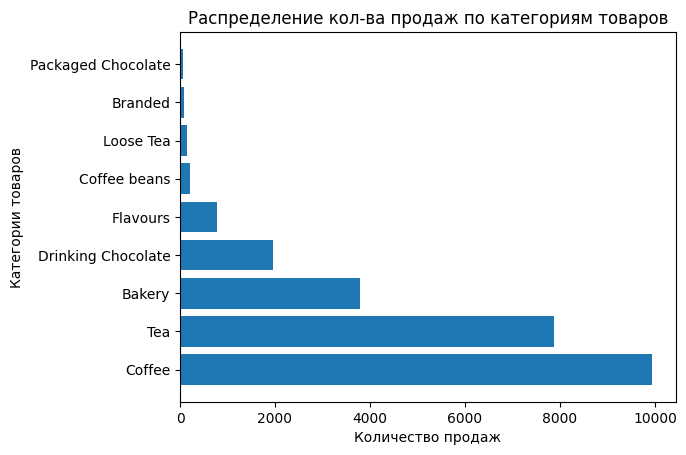

In [ ]:
labels = product_category.value_counts().index
values = product_category.value_counts().values
plt.barh(labels, values)
plt.title("Распределение кол-ва продаж по категориям товаров")
plt.ylabel("Категории товаров")
plt.xlabel("Количество продаж")
plt.show()

**Вывод:**
1. Всего в датасете 9 уникальных категорий товара.
2. Чаще всего встречается значение Coffee. Оно встретилось 9948 раз.
3. Наиболее встречаемые категории: Coffee, Tea, Bakery. Наименее встречаемые категории: Packaged Chocolate, Branded, Loose Tea.
4. Столбчатая диаграмма показывает, что наиболее часто люди покупают кофе и чай.

###store_city

In [ ]:
#возьмем отдельно колонку с городами, где расположены кофейни
cities = df['store_city']
cities

,store_city
0,Санкт-Петербург
1,Санкт-Петербург
2,Санкт-Петербург
3,Санкт-Петербург
4,Санкт-Петербург
...,...
24847,Москва
24848,Москва
24849,Москва
24850,Москва


In [ ]:
#посмотрим на общую информацию о признаке
cities.describe()

,store_city
count,24852
unique,2
top,Москва
freq,16259


In [ ]:
#посмотрим на количество каждого из значений признака
cities.value_counts()

,count
store_city,
Москва,16259
Санкт-Петербург,8593


Text(0.5, 1.0, 'Распределение количества продаж по городам в %')

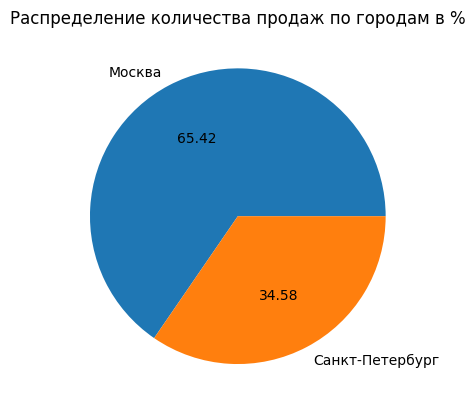

In [ ]:
#построим круговую диаграмму для признака
labels=cities.value_counts().index
values = cities.value_counts().values
plt.pie(x=values, labels=labels, autopct='%.2f',)
plt.title("Распределение количества продаж по городам в %")

**Вывод:**
1. Уникальных значений признака - 2. Это Санкт-Петербург и Москва.
2. Наиболее часто встречается значение Москва. Оно встретилось 16259 раз. Значение Санкт-Петербург встретилось 8593 раза.
3. Круговая диаграмма показала, что в 65.42% случаях встречается значение Москва. В 34.58% случаях встречается значение Санкт-Петербург. Это говорит о том, что больше покупок совершается в Московских кофейнях в совокупности, чем в Питерских.


###customer_gender

In [ ]:
#возьмем отдельно признак пол покупателя
gender = df['customer_gender']
gender

,customer_gender
0,женский
1,не указан
2,не указан
3,женский
4,мужской
...,...
24847,мужской
24848,мужской
24849,мужской
24850,женский


In [ ]:
#посмотрим общую информацию о признаке
gender.describe()

,customer_gender
count,24852
unique,3
top,женский
freq,10851


In [ ]:
#посмотрим на количество значений признака
gender.value_counts()

,count
customer_gender,
женский,10851
мужской,8222
не указан,5779


Text(0.5, 1.0, 'Распределение кол-ва продаж по полу покупателя в %')

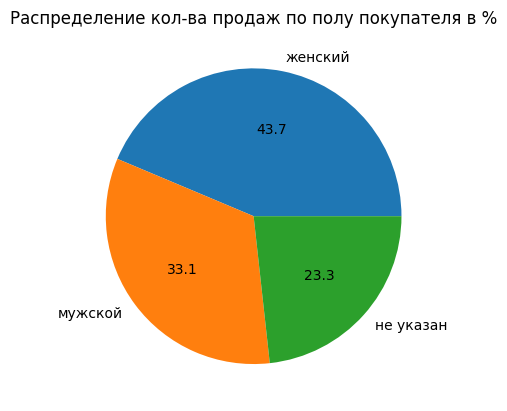

In [ ]:
#построим круговую диаграмму распределения признака
labels = gender.value_counts().index
values = gender.value_counts().values
plt.pie(x=values,labels=labels,autopct='%.1f')
plt.title("Распределение кол-ва продаж по полу покупателя в %")

**Вывод:**
1. Уникальных значений признака пол - 3. Это мужской, женский и не указан.
2. Наиболее часто встретилось значение признака - "женский". Оно встретилось 10851 раз. Слудующим идет значений признака "мужской" - 8222 раза. Затем значение "не указан" -  5779 раз.
3. Круговая диаграмма показала, что в процентном соотношении больше всего встречалось значение пола "женский" - 43.7%.
4. Если отвечать на вопрос кто является основным клиентом сети в разрезе пола покупателей, то можно предположить, что это женщины, если не учитывать людей, которые не указали свой пол. Но таких достаточно много - 23.3%. В данном случае нужно уточнить у Заказчика стоит ли не учитывать людей, которые не указали пол.

###product_name

In [ ]:
#возьмем отдельно колонку с названием продукта
product_name=df['product_name']
product_name

,product_name
0,Traditional Blend Chai Rg
1,Brazilian Lg
2,Serenity Green Tea Rg
3,Our Old Time Diner Blend Rg
4,Jamaican Coffee River Sm
...,...
24847,Cappuccino Lg
24848,Ouro Brasileiro shot
24849,Brazilian Sm
24850,Peppermint Rg


In [ ]:
#посмотрим общую информацию о признаке
product_name.describe()

,product_name
count,24852
unique,80
top,Morning Sunrise Chai Rg
freq,521


In [ ]:
#посмотрим на распределение значений в признаке
product_name.value_counts()

,count
product_name,
Morning Sunrise Chai Rg,521
Columbian Medium Roast Rg,516
Latte,516
Sustainably Grown Organic Lg,516
Traditional Blend Chai Rg,515
...,...
Espresso Roast,17
Chili Mayan,17
Earl Grey,15


In [ ]:
#посмотрим на топ-20 популярных товаров
product_name.value_counts()[:20]

,count
product_name,
Morning Sunrise Chai Rg,521
Columbian Medium Roast Rg,516
Latte,516
Sustainably Grown Organic Lg,516
Traditional Blend Chai Rg,515
Brazilian Sm,515
Our Old Time Diner Blend Sm,515
English Breakfast Lg,509
Spicy Eye Opener Chai Lg,507


В данном признаке 80 уникальных значений. Построим столбчатую диаграмму для топ-10 товаров в порядке убывания продаж.

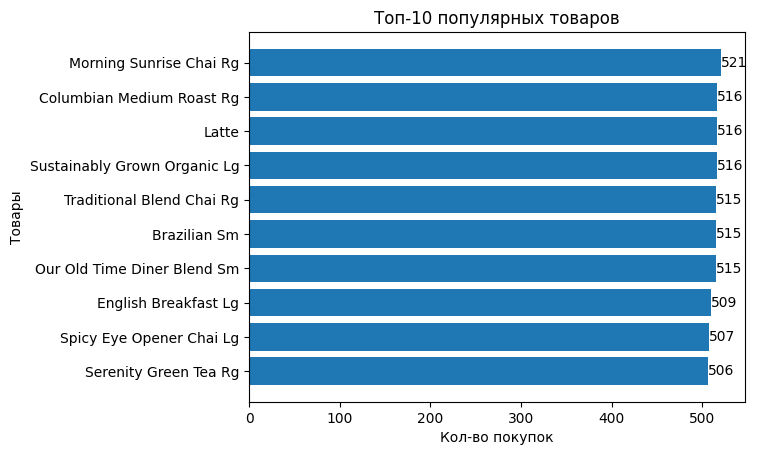

In [ ]:
labels = product_name.value_counts().index[:10][::-1]
values = product_name.value_counts().values[:10][::-1]
fig, ax = plt.subplots()
bars = ax.barh(labels, values)
ax.bar_label(bars, [str(x) for x in values])
plt.title("Топ-10 популярных товаров")
plt.xlabel("Кол-во покупок")
plt.ylabel("Товары")
plt.show()

**Вывод:**
1. Уникальных значений признака - 80.
2. Наиболее встречаемое значение - Morning Sunrise Chai Rg, которое встречается 521 раз.
3. Топ-10 наиболее встречаемых значений признака:

- Morning Sunrise Chai Rg -	521
- Columbian Medium Roast Rg -	516
- Latte -	516
- Sustainably Grown Organic Lg -	516
- Traditional Blend Chai Rg -	515
- Brazilian Sm -	515
- Our Old Time Diner Blend Sm -	515
- English Breakfast Lg -	509
- Spicy Eye Opener Chai Lg -	507
- Serenity Green Tea Rg -	506

4. Наименее встречаемые значения признака (5 наименее встречаемых):

- Espresso Roast -	17
- Chili Mayan -	17
- Earl Grey -	15
- Peppermint -	14
- Spicy Eye Opener Chai -	13



###sales_outlet_id

Данный признак, хоть и является числом, но это идентификатор кофейни. По смыслу он больше похож на категориальный признак.

In [ ]:
#возьмем отдельно данный признак
sales_outlet = df['sales_outlet_id']
sales_outlet

,sales_outlet_id
0,3
1,3
2,3
3,3
4,3
...,...
24847,8
24848,8
24849,8
24850,8


In [ ]:
#посмотрим на количество уникальных значений
sales_outlet.unique()

array([3, 5, 8])

In [ ]:
#переведем признак в строковый тип для дальнейшего анализа
sales_outlet_str =  sales_outlet.apply(lambda x: str(x))
type(sales_outlet_str[0])

str

In [ ]:
#посмотрим общую информацию о признаке
sales_outlet_str.describe()

,sales_outlet_id
count,24852
unique,3
top,3
freq,8593


In [ ]:
#посмотрим на распределение значений
sales_outlet_str.value_counts()

,count
sales_outlet_id,
3,8593
5,8545
8,7714


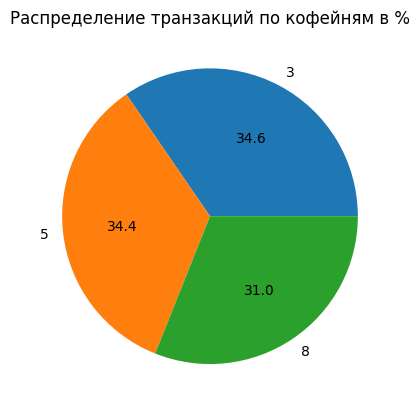

In [ ]:
#построим круговую диаграмму признака
labels= sales_outlet_str.value_counts().index
values = sales_outlet_str.value_counts().values
plt.pie(x=values, labels = labels, autopct="%.1f")
plt.title("Распределение транзакций по кофейням в %")
plt.show()

In [ ]:
#посмотрим в каких городах находятся какие кофейни
store_3 = df[df['sales_outlet_id']==3]['store_city'].unique()
store_5 = df[df['sales_outlet_id']==5]['store_city'].unique()
store_8 = df[df['sales_outlet_id']==8]['store_city'].unique()
print("Город кофейни с id=3 " + store_3)
print("Город кофейни с id=5 " + store_5)
print("Город кофейни с id=8 " + store_8)

['Город кофейни с id=3 Санкт-Петербург']
['Город кофейни с id=5 Москва']
['Город кофейни с id=8 Москва']


**Вывод:**
1. Уникальных значений признака - 3. Это 3, 5 и 8.
2. Чаще всего встречались значения 5 (8593 раза) и 3 (8545 раз). Чуть реже значение 8 (7714 раза).
3. Наиболее встречаемые - это значения 3 (частость 34,6%) и 5 (частость 34,4%). Их частота отличается на 0,2 процента. Чуть реже встречается значение 8 (частость 31%)
4. Выяснилось, что кофейни 5 и 8 находятся в Москве, а кофейня 3 находится в Питере.
5. Можно сказать, что кофейни 3 и 5 имеют одинаковую частость покупок. А вот кофейня 8 отстает от них, примерно на 800 покупок.

##Числовые (дискретные)

###quantity

In [ ]:
#возьмем отдельно колонку с признаком
quantity = df['quantity']
quantity

,quantity
0,1
1,2
2,2
3,2
4,1
...,...
24847,1
24848,1
24849,2
24850,2


In [ ]:
#посмотрим на общую информацию о признаке
quantity.describe()

,quantity
count,24852.000000
mean,1.435458
std,0.527978
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


In [ ]:
#вспомним сколько уникальных значений у признака
quantity.unique()

array([1, 2, 4, 3, 8])

Всего 5 уникальных значений

Посмотрим на количество значений

In [ ]:
quantity.value_counts()

,count
quantity,
1,14419
2,10054
3,373
4,5
8,1


Так как здесь всего 5 уникальных значений, то смысла строить гистограмму нет. Построим столбчатую диаграмму и посмотрим как распределяются значения признака.

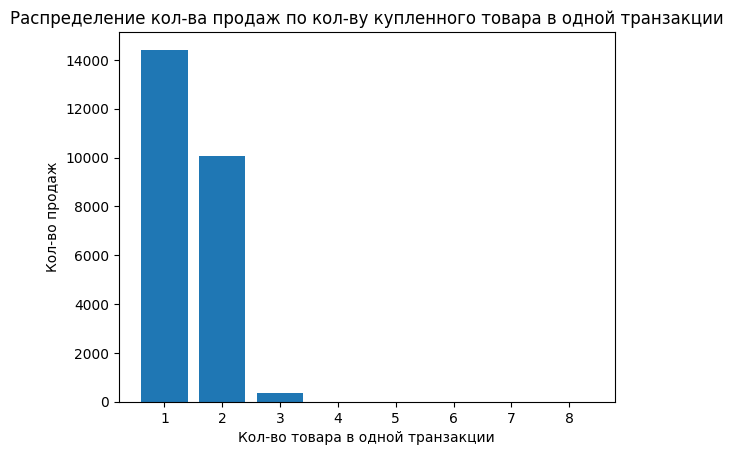

In [ ]:
labels = quantity.value_counts().index
values = quantity.value_counts().values
plt.bar(labels, values)
plt.title("Распределение кол-ва продаж по кол-ву купленного товара в одной транзакции")
plt.xlabel("Кол-во товара в одной транзакции")
plt.ylabel("Кол-во продаж")
plt.show()

Посмотрим на значение 99 процентиля (то есть узнаем значение, меньше которого существует 99% значений признака)

In [ ]:
quantity.quantile(0.99)

np.float64(3.0)

Это значение 3. То есть 99% значений признака меньше тройки.

Построим боксплот

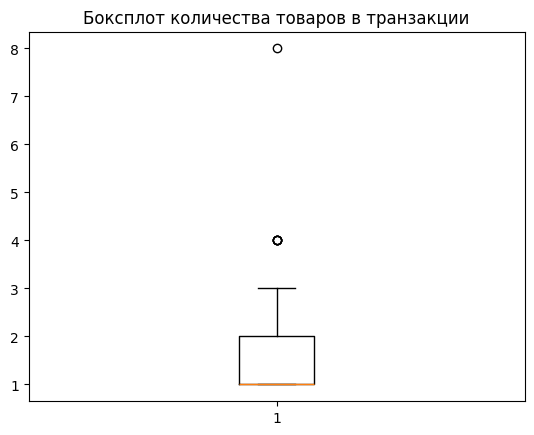

In [ ]:
plt.boxplot(quantity)
plt.title("Боксплот количества товаров в транзакции")
plt.show()

**Вывод:**
1. Максимальное значение признака - 8. Минимальное значение признака - 1. Размах - 7.
2. Нулевых значений не обнаружено.
3. 99% значений меньше или равны значению 3.
4. Уникальных значений признака - 5.
5. Значение 1 является наиболее встречаемым - 14419 раз. Следующее за ним значение 2 - 10054 раза. Значение 3 встретилось 373 раза. Значение 4 встретилось 5 раз. Значение 8 встретилось 1 раз.
6. Можно сделать вывод, что наиболее часто люди покупают по одному товару в кофейне,чуть реже покупают по два товара за одну транзакцию. Совсем редко покупают 3 товара за одну транзакцию. 4 и 8 товаров за одну транзакцию - это единичные случаи, они являются естественными выбросами, т.к. вполне реальны.


###customer_id

In [ ]:
len(df['customer_id'].unique())

2245

Мы увидели, что всего кофейни посещало 2245 клиентов. Так как мы работаем с признаком id клиента, мы можем только узнать какие клиенты чаще покупали продукцию, а какие меньше. Но для анализа это нам не нужно.

###customer_age

In [ ]:
#возьмем признак возраст клиента
age=df['customer_age']
age

,customer_age
0,42
1,34
2,30
3,26
4,58
...,...
24847,63
24848,71
24849,72
24850,31


In [ ]:
#посмотрим общую информацию о признаке
age.describe()

,customer_age
count,24852.000000
mean,46.744729
std,15.100800
min,24.000000
25%,33.000000
50%,44.000000
75%,60.000000
max,75.000000


In [ ]:
#посмотрим на процентили
percentile_10 = age.quantile(0.10)
percentile_25 = age.quantile(0.25)
percentile_50 = age.quantile(0.50)
percentile_75 = age.quantile(0.75)
percentile_90 = age.quantile(0.90)
percentile_99 = age.quantile(0.99)
print(f'10 процентиль = {percentile_10}',
      f'25 процентиль = {percentile_25}',
      f'50 процентиль (медиана) = {percentile_50}',
      f'75 процентиль = {percentile_75}',
      f'90 процентиль = {percentile_90}',
      f'99 процентиль = {percentile_99}', sep='\n')

10 процентиль = 28.0
25 процентиль = 33.0
50 процентиль (медиана) = 44.0
75 процентиль = 60.0
90 процентиль = 69.0
99 процентиль = 75.0


In [ ]:
#посмотрим у скольких записей возраст больше 99 процентиля
df[df['customer_age']>percentile_99]

,Unnamed: 0,transaction_id,quantity,unit_price,total,product_name,product_category,sales_outlet_id,store_city,customer_id,customer_age,customer_gender


Таких записей нет

In [ ]:
#посмотрим соклько записей имеют возраст равный 99 проентилю
df[df['customer_age']==percentile_99]

,Unnamed: 0,transaction_id,quantity,unit_price,total,product_name,product_category,sales_outlet_id,store_city,customer_id,customer_age,customer_gender
25,25,25,1,162.50,162.50,Earl Grey Rg,Tea,3,Санкт-Петербург,302,75,женский
67,67,67,1,195.00,195.00,Earl Grey Lg,Tea,3,Санкт-Петербург,301,75,женский
260,260,260,1,162.50,162.50,Serenity Green Tea Rg,Tea,3,Санкт-Петербург,2,75,мужской
261,261,261,1,227.50,227.50,Croissant,Bakery,3,Санкт-Петербург,2,75,мужской
264,264,264,1,243.75,243.75,Cappuccino,Coffee,3,Санкт-Петербург,305,75,женский
...,...,...,...,...,...,...,...,...,...,...,...,...
24581,24581,49355,1,243.75,243.75,Latte,Coffee,5,Москва,5500,75,женский
24582,24582,49356,1,243.75,243.75,Jumbo Savory Scone,Bakery,5,Москва,5500,75,женский
24697,24697,49471,1,143.00,143.00,Brazilian Sm,Coffee,5,Москва,5361,75,мужской
24698,24698,49472,1,243.75,243.75,Jumbo Savory Scone,Bakery,5,Москва,5361,75,мужской


Таких записей 273. Значение 75 вполне реально, поэтому удалять такие записи мы не будем.

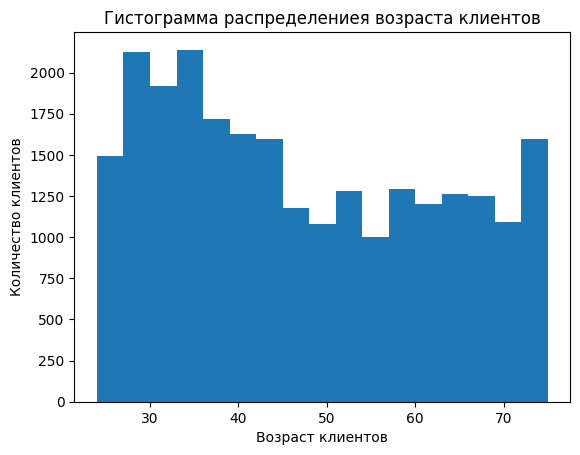

In [ ]:
#построим гистограмму для данного признака
plt.hist(age, bins=17)
plt.title("Гистограмма распределениея возраста клиентов")
plt.xlabel("Возраст клиентов")
plt.ylabel("Количество клиентов")
plt.show()

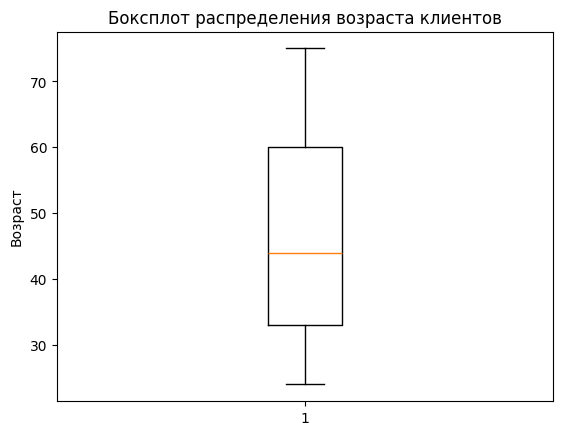

In [ ]:
#построим боксплот распределения возраста клиентов
plt.boxplot(age)
plt.title("Боксплот распределения возраста клиентов")
plt.ylabel("Возраст")
plt.show()

**Вывод:**
1. Максимальное значение признака - 75. Минимальное значение признака - 24. Рзмах = 51.
2. Нулевых значений не обнаружено.
3. Среднее значение составляет 46 лет, а медиана 44 года. Медиана и среднее не сильно друг от друга отличаются. Среднее на 2 единицы больше, чем медиана. Это может говорить о том, что достаточно много записей, где возраст клиента равен 75. Как проверили ранее, таких записей 273. Их наличие, возможно, и потянуло среднее вверх.
4. - 10 процентов данных не превышают значение = 28.0
 - 25 процентов данных не превышают значение = 33.0
 - 50 процентов данных не превышают значение = 44.0
 - 75 процентов данных не превышают значение = 60.0
 - 90 процентов данных не превышают значение = 69.0
 - 99 процентов данных не превышают значение = 75.0
5. Выбросов по признаку "Возраст клиента" не обнаружено.
6. Боксплот показывает, что основная часть покуптелей - это люди с возрастом от 33 до 60 лет. То есть основной клиент в признаке возраста - это взрослая часть населения.
7. Гистограмма показывает, что людей с возрастом от 28 до 35 лет ходит больше (около двух тысяч на каждый из возрастов), чем людей постарше. После 35 лет график начинает очень плавно "проседать" до 45 лет. Людей с возрастом из данного промежутка (для каждого возраста) ходит примерно 1700-1600 человек. На значении в 45 лет график резко опускается вниз до значения в 1100. После 45 лет, для каждого из возрастов, количество людей колеблется от 1000 до 1250. В возрасте 73-75 лет количество людей для каждого возраста из промежутка вырастает до 1600 человек.

##Числовые (непрерывные)

###unit_price

In [ ]:
unit_price = df['unit_price']
unit_price

,unit_price
0,162.50
1,227.50
2,162.50
3,162.50
4,159.25
...,...
24847,276.25
24848,136.50
24849,143.00
24850,162.50


In [ ]:
#посмотрим на общую информацию о признаке
unit_price.describe()

,unit_price
count,24852.000000
mean,215.345534
std,148.537146
min,52.000000
25%,162.500000
50%,195.000000
75%,243.750000
max,2925.000000


In [ ]:
#посмотрим какие товары стоят 52 рубля, то есть минимальную цену, из представленных
df[df['unit_price']==52]['product_category'].unique()

array(['Flavours'], dtype=object)

Видим, что это ароматизаторы. Они могут так стоить. Значение реально.

Также мы помним, что максимальная цена - 2925 рублей - это цена за пачку кофейных зерен. Данное значение уместно.

In [ ]:
#посмотрим на процентили
percentile_10 = unit_price.quantile(0.10)
percentile_25 = unit_price.quantile(0.25)
percentile_50 = unit_price.quantile(0.50)
percentile_75 = unit_price.quantile(0.75)
percentile_90 = unit_price.quantile(0.90)
percentile_99 = unit_price.quantile(0.99)
print(f'10 процентиль = {percentile_10}',
      f'25 процентиль = {percentile_25}',
      f'50 процентиль = {percentile_50}',
      f'75 процентиль = {percentile_75}',
      f'90 процентиль = {percentile_90}',
      f'99 процентиль = {percentile_99}', sep='\n')

10 процентиль = 143.0
25 процентиль = 162.5
50 процентиль = 195.0
75 процентиль = 243.75
90 процентиль = 276.25
99 процентиль = 910.0


In [ ]:
#посмотрим какие данные имеют значение больше 90 процентиля
df[df['unit_price']>percentile_90]

,Unnamed: 0,transaction_id,quantity,unit_price,total,product_name,product_category,sales_outlet_id,store_city,customer_id,customer_age,customer_gender
26,26,26,2,292.50,585.0,Dark chocolate Lg,Drinking Chocolate,3,Санкт-Петербург,174,46,мужской
46,46,46,2,308.75,617.5,Sustainably Grown Organic Lg,Drinking Chocolate,3,Санкт-Петербург,642,32,женский
92,92,92,1,292.50,292.5,Dark chocolate Lg,Drinking Chocolate,3,Санкт-Петербург,453,56,женский
104,104,104,1,292.50,292.5,Dark chocolate Lg,Drinking Chocolate,3,Санкт-Петербург,486,52,женский
131,131,131,1,292.50,292.5,Dark chocolate Lg,Drinking Chocolate,3,Санкт-Петербург,482,52,женский
...,...,...,...,...,...,...,...,...,...,...,...,...
24772,24772,49675,2,308.75,617.5,Sustainably Grown Organic Lg,Drinking Chocolate,8,Москва,8268,46,женский
24780,24780,49689,1,292.50,292.5,Scottish Cream Scone,Bakery,8,Москва,8272,34,не указан
24781,24781,49698,1,292.50,292.5,Dark chocolate Lg,Drinking Chocolate,8,Москва,8239,28,не указан
24788,24788,49722,1,292.50,292.5,Dark chocolate Lg,Drinking Chocolate,8,Москва,8179,68,мужской


In [ ]:
#посмотрим на категории товаров этих значений
df[df['unit_price']>percentile_90]['product_category'].unique()

array(['Drinking Chocolate', 'Bakery', 'Coffee beans', 'Loose Tea',
       'Packaged Chocolate', 'Branded'], dtype=object)

Видим, что это горячий шоколад, выпечка, пачки кофейных зерен и расспчатого чая, пакетированный шоколад и мерч. Значения, большие 90 процентиля реальны для этих категорий, т.к. в основном люди покупают кофе и чай (по результатам предыдушего анализа), которые стоят дешевле. Значения, большие 90 процентиля - это естественные выбросы.

In [ ]:
#посмотрим какие записи в данном признаке имеют 99 процентиль или больше
df[df['unit_price']>=percentile_99]

,Unnamed: 0,transaction_id,quantity,unit_price,total,product_name,product_category,sales_outlet_id,store_city,customer_id,customer_age,customer_gender
10194,10194,10205,1,1495.00,1495.00,Organic Decaf Blend,Coffee beans,5,Москва,5598,37,не указан
10219,10219,10243,1,1495.00,1495.00,Organic Decaf Blend,Coffee beans,5,Москва,5494,32,женский
10266,10266,10313,1,1820.00,1820.00,Organic Decaf Blend,Coffee beans,5,Москва,5598,37,не указан
10290,10290,10349,1,1170.00,1170.00,Our Old Time Diner Blend,Coffee beans,5,Москва,5693,29,не указан
10316,10316,10395,1,1283.75,1283.75,Jamacian Coffee River,Coffee beans,5,Москва,5033,50,женский
...,...,...,...,...,...,...,...,...,...,...,...,...
23045,23045,46116,1,1283.75,1283.75,Jamacian Coffee River,Coffee beans,5,Москва,5150,32,мужской
23073,23073,46215,1,2925.00,2925.00,Civet Cat,Coffee beans,5,Москва,5354,34,женский
23075,23075,46217,1,958.75,958.75,Espresso Roast,Coffee beans,5,Москва,5227,59,женский
23092,23092,46261,1,958.75,958.75,Espresso Roast,Coffee beans,5,Москва,5210,32,не указан


Видим, что это пачки кофейных зерен. Убедимся в этом.

In [ ]:
df[df['unit_price']>=percentile_99]['product_category'].unique()

array(['Coffee beans', 'Branded'], dtype=object)

Здесь появилась еще одна категория. Посмотрим на записи с ней.

In [ ]:
df[(df['unit_price']>=percentile_99)&(df['product_category']=='Branded')]

,Unnamed: 0,transaction_id,quantity,unit_price,total,product_name,product_category,sales_outlet_id,store_city,customer_id,customer_age,customer_gender
10700,10700,11643,1,910.0,910.0,I Need My Bean! Latte cup,Branded,3,Санкт-Петербург,549,43,женский
10732,10732,11690,1,910.0,910.0,I Need My Bean! Latte cup,Branded,3,Санкт-Петербург,569,41,женский
10959,10959,12028,1,910.0,910.0,I Need My Bean! Latte cup,Branded,5,Москва,5371,36,не указан
11686,11686,13735,1,910.0,910.0,I Need My Bean! Latte cup,Branded,5,Москва,5796,33,мужской
11721,11721,13844,1,1820.0,1820.0,I Need My Bean! T-shirt,Branded,5,Москва,5058,47,мужской
11750,11750,13905,1,910.0,910.0,I Need My Bean! Latte cup,Branded,5,Москва,5175,74,мужской
11789,11789,14009,1,910.0,910.0,I Need My Bean! Latte cup,Branded,5,Москва,5304,60,женский
11801,11801,14048,1,1820.0,1820.0,I Need My Bean! T-shirt,Branded,5,Москва,5553,35,женский
12336,12336,15526,1,1820.0,1820.0,I Need My Bean! T-shirt,Branded,5,Москва,5125,32,не указан
12808,12808,16335,1,910.0,910.0,I Need My Bean! Latte cup,Branded,8,Москва,8335,59,мужской


Мы видим, что это предметы мерча. В таком случае значения вполне реальны.

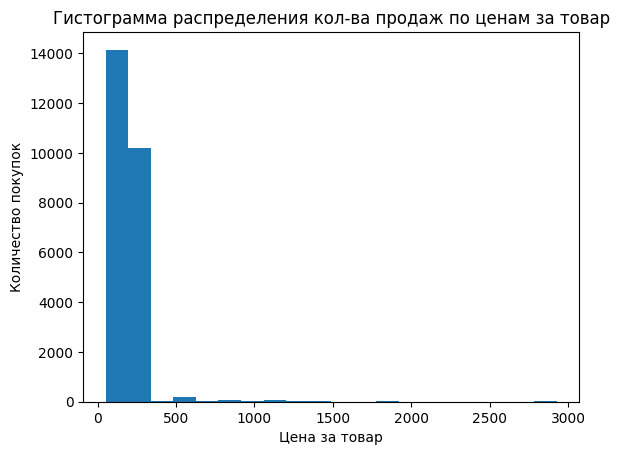

In [ ]:
#построим гистограмму
plt.hist(unit_price, bins=20)
plt.title("Гистограмма распределения кол-ва продаж по ценам за товар")
plt.xlabel("Цена за товар")
plt.ylabel("Количество покупок")
plt.show()

Гистограмма показывает, что люди покупают товары, примерно до 300 рублей за штуку. Но есть и выбросы - это кофейные зерна, мерч и некоторые другие товары. Эти выбросы являются естественными и не ошибочными, поэтому удалять их не будем. Но построим еще одну гистограмму без них (для данных, которые <=99 процентилю), чтобы получше рассмотреть распределение основных цен.

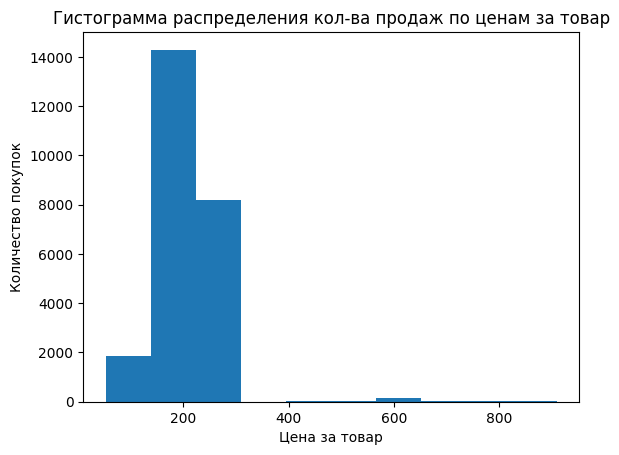

In [ ]:
plt.hist(df[df['unit_price']<=percentile_99]['unit_price'])
plt.title("Гистограмма распределения кол-ва продаж по ценам за товар")
plt.xlabel("Цена за товар")
plt.ylabel("Количество покупок")
plt.show()

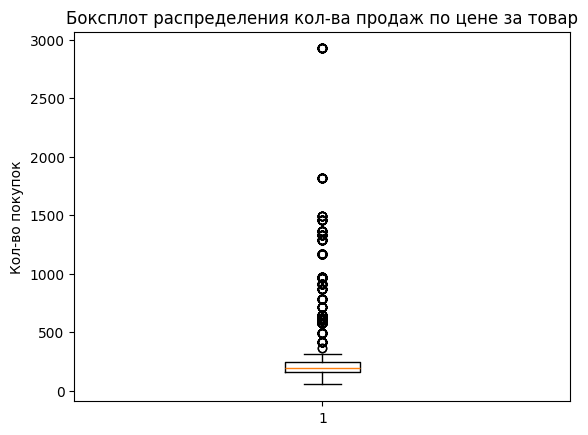

In [ ]:
#построим боксплот для всех значений признака
plt.boxplot(unit_price)
plt.title("Боксплот распределения кол-ва продаж по цене за товар")
plt.ylabel("Кол-во покупок")
plt.show()

Здесь видим большое количество естественных выбросов. Построим боксплот для данных, значения которых мньше или равны 99 процентилю.

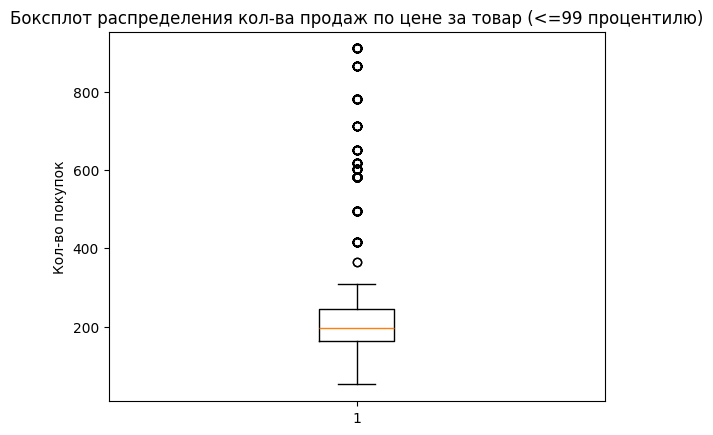

In [ ]:
plt.boxplot(df[df['unit_price']<=percentile_99]['unit_price'])
plt.title("Боксплот распределения кол-ва продаж по цене за товар (<=99 процентилю)")
plt.ylabel("Кол-во покупок")
plt.show()

Иключим и остальные выбросы для боксплота. Построим боксплот с данными, меньшими или равными 90 процентилю.

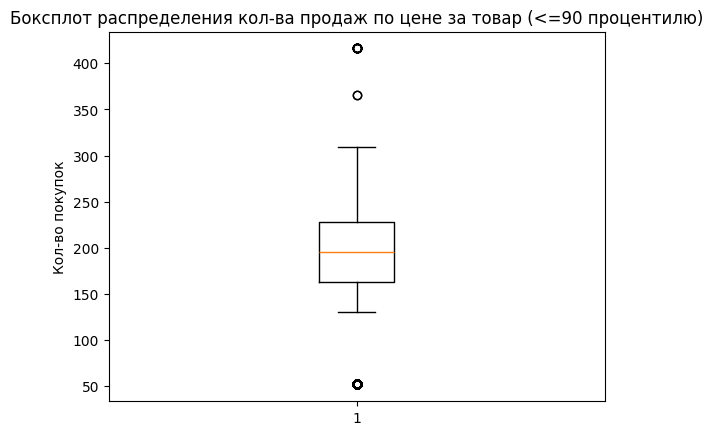

In [ ]:
plt.boxplot(df[df['unit_price']<=percentile_90]['unit_price'])
plt.title("Боксплот распределения кол-ва продаж по цене за товар (<=90 процентилю)")
plt.ylabel("Кол-во покупок")
plt.show()

**Вывод:**
1. Максимальное значение признака - 2925. Минимальное значение признака - 52. Размах составляет 2873.
2. Нулевых значений не выявлено.
3. Среднее равно примерно 215. Медиана равна 195. Разница 20 рублей. Среднее могло потянуться вверх из-за товаров, которые стоят 900 рублей и больше.
4. - 10% данных не превышают значение 143.0
 - 25% данных не превышают значение 162.5
 - 50% данных не превышают значение 195.0
 - 75% данных не превышают значение 243.75
 - 90% данных не превышают значение 276.25
 - 99% данных не превышают значение 910.0
5. Гистограмма, боксплот и значения процентилей показывают, что в основном люди покупают товары, которые за 1 штуку стоят от 162 до 243 рублей.  



###total

In [ ]:
total= df['total']

In [ ]:
total.describe()

,total
count,24852.000000
mean,299.613802
std,230.478316
min,52.000000
25%,195.000000
50%,243.750000
75%,390.000000
max,23400.000000


In [ ]:
#посмотрим на максимально значение
df[df['total']==23400]

,Unnamed: 0,transaction_id,quantity,unit_price,total,product_name,product_category,sales_outlet_id,store_city,customer_id,customer_age,customer_gender
17743,17743,28980,8,2925.0,23400.0,Civet Cat,Coffee beans,8,Москва,8311,58,женский


Видим, что это 8 пачек кофейных зерен. Тут все в порядке.

In [ ]:
#посмотрим на процентили
percentile_10 = total.quantile(0.10)
percentile_25 = total.quantile(0.25)
percentile_50 = total.quantile(0.50)
percentile_75 = total.quantile(0.75)
percentile_90 = total.quantile(0.90)
percentile_99 = total.quantile(0.99)
print(f'10 процентиль = {percentile_10}',
      f'25 процентиль = {percentile_25}',
      f'50 процентиль = {percentile_50}',
      f'75 процентиль = {percentile_75}',
      f'90 процентиль = {percentile_90}',
      f'99 процентиль = {percentile_99}', sep='\n')


10 процентиль = 162.5
25 процентиль = 195.0
50 процентиль = 243.75
75 процентиль = 390.0
90 процентиль = 487.5
99 процентиль = 910.0


Так как признак total - это общая сумма покупки, значит, что это цена одного товара, умноженная на количество этих купленных товаров. Так так с ценами на одну штуку товара все в порядке и нет ошибочных значений, то и в признаке total также не будет ошибочных значений. Есть естественные выбросы, которые, скорее всего, возникли из-за естествееных выбросов в признаке unit_price.

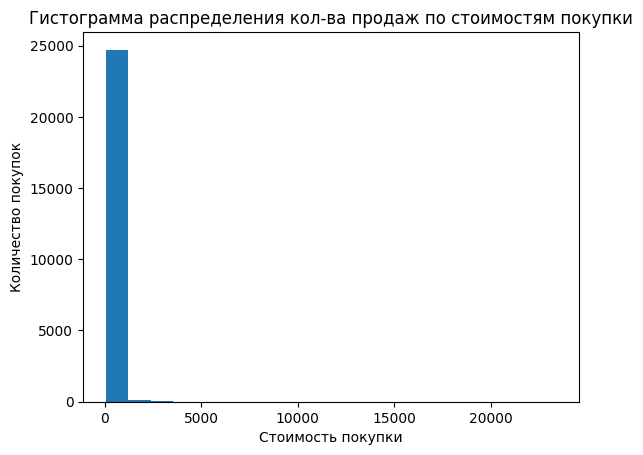

In [ ]:
#посмотрим на гистограмму
plt.hist(total, bins=20)
plt.title("Гистограмма распределения кол-ва продаж по стоимостям покупки")
plt.xlabel("Стоимость покупки")
plt.ylabel("Количество покупок")
plt.show()

Так как дорогие товары покупались не в единичном экземпляре, то общая стоимость покупки высоко поднялась.

Для более наглядной гистограммы с основными стоимостями за покупки, ограничим данные 99 проценилем.

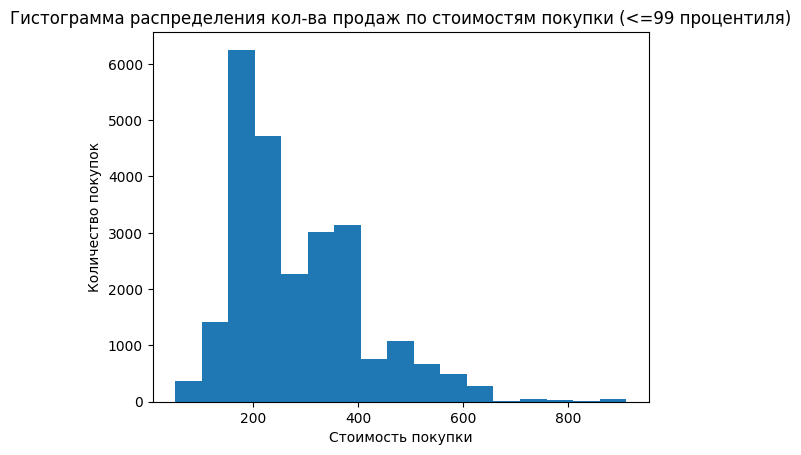

In [ ]:
plt.hist(df[df['total']<=percentile_99]['total'], bins=17)
plt.title("Гистограмма распределения кол-ва продаж по стоимостям покупки (<=99 процентиля)")
plt.xlabel("Стоимость покупки")
plt.ylabel("Количество покупок")
plt.show()

Видим, что больше всего люди делают покупки на сумму от 180 до 250, меньше покупают на суммы от 300 до 400. На суммы после 400 рублей, люди покупки практически не делают.

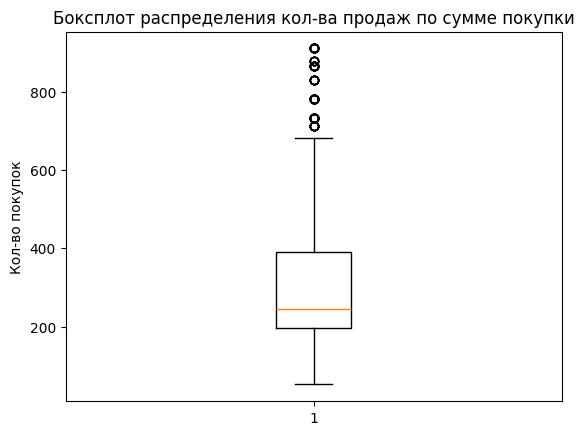

In [ ]:
#построим боксплот для данных <= 99 процентилю
plt.boxplot(df[df['total']<=percentile_99]['total'])
plt.title("Боксплот распределения кол-ва продаж по сумме покупки")
plt.ylabel("Кол-во покупок")
plt.show()

**Вывод:**
1. Максимальное значение признака - 23400. Минимальное значение признака - 52. Размах 23348. Такой размах из-за того, что кто-то купил дешевый товар в единичном экземпляре, а кто-то дорогой и несколько.
2. Нулевых значений не обнаружено.
3. Среднее равно примерно 299. Медиана равна примерно 243. Среднее получилось больше медианы из-за того, что есть очень крупные суммы покупок, которые потянули среднее вверх.
4.  - 10% данных меньше или равны 162.5
 - 25% данных меньше или равны 195.0
 - 50% данных меньше или равны 243.75
 - 75% данных меньше или равны 390.0
 - 90% данных меньше или равны 487.5
 - 99% данных меньше или равны 910.0
5. Гистограмма, боксплот и процентили показывают, что в основном люди совершают покупки на сумму от 195 до 390 рублей. Есть люди, которые совершают покупки на суммы более 400 рублей. Но в общем количестве покупок таких мало.


##Распределение продаж по существующей сети кофеен

Посмотрим на распределение продаж по кофейням. То есть посмотрим сколько каждая кофейня зарабатывает в сумме. Для этого нужно сгруппировать транзакции по кофейням и сложить итоговые суммы покупок в этих кофейнях.

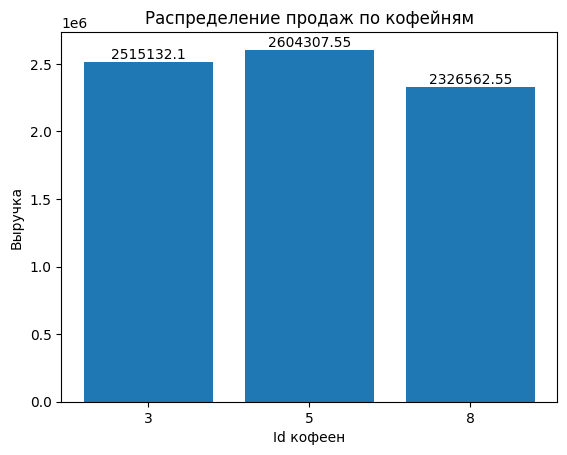

In [ ]:
distribution_of_sales = df.groupby('sales_outlet_id')['total'].sum()
labels = [str(x) for x in distribution_of_sales.index]
values = distribution_of_sales.values
fig, ax = plt.subplots()
bars = ax.bar(labels,values)
ax.bar_label(bars,values)
plt.title("Распределение продаж по кофейням")
plt.xlabel("Id кофеен")
plt.ylabel("Выручка")
plt.show()

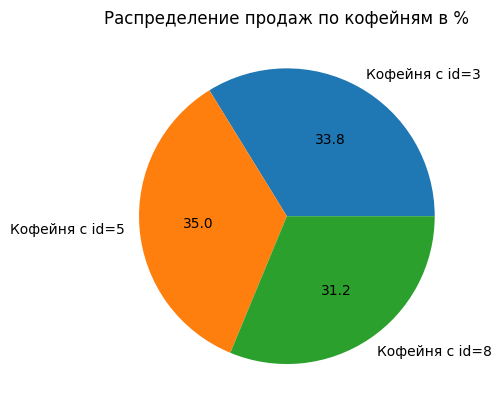

In [ ]:
#построим круговую диаграмму
distribution_of_sales = df.groupby('sales_outlet_id')['total'].sum()
labels = ["Кофейня с id=" + str(x) for x in distribution_of_sales.index]
plt.pie(x=distribution_of_sales.values, labels=labels, autopct='%.1f')
plt.title("Распределение продаж по кофейням в %")
plt.show()

**Вывод:**

Кофейня с id=3 (Питер) зарабатывает примерно 2,5 миллиона.

Кофейня с id=5 (Москва) зарабатывает примерно 2,6 миллиона.

Кофейня с id=8 (Москва) зарабатывает примерно 2,3 миллиона.

На первом месте по продажам кофейня с id=5. Она имеет 35% всех представленных в датасете продаж. Затем идет кофейня с id=3. Она имеет 33,8% продаж. На третьем месте кофейня с id=8, которая имеет 31,2% продаж, представленных в датасете.

##Вклад видов продукции в объем продаж. От каких стоит отказаться?

Чтобы узнать вклад видов продукции в объем продаж нужно сгруппировать транзакции по видам продукции и в рамках групп посчитать суммарную стоимость товаров.

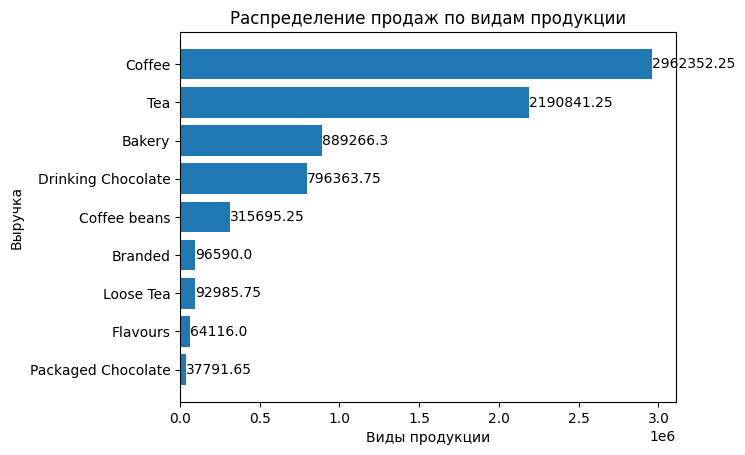

In [ ]:
contribution_types_products = df.groupby('product_category')['total'].sum().sort_values()
labels = [str(x) for x in contribution_types_products.index]
values = contribution_types_products.values
fig, ax = plt.subplots()
bars = ax.barh(labels,values)
ax.bar_label(bars,values)
plt.title("Распределение продаж по видам продукции")
plt.xlabel("Виды продукции")
plt.ylabel("Выручка")
plt.show()

In [ ]:
#посмотрим сколько процентов составляет продажа топ-5 категорий продукции от всей суммы продаж
values = contribution_types_products.values
all = df['total'].sum()
coffee = (values[8] / all)*100
tea = (values[7] / all)*100
bakery = (values[6] / all)*100
chocolate = (values[5] / all)*100
beans = (values[4] / all)*100
print(coffee, tea, bakery, chocolate, beans)

39.784466488607805 29.42305402488331 11.942869154672021 10.695185531908653 4.239795282359707


In [ ]:
#для дальнейших выводов узнаем какое медианное значение имеет цена Ароматизатора
df[df['product_category']=='Flavours']['unit_price'].median()

52.0

In [ ]:
#для дальнейших выводов узнаем меданную цену Мерча
df[df['product_category']=='Branded']['unit_price'].median()

910.0

**Вывод:**
 - Наибольший вклад в продажи вносит продукция категории Кофе - 2,9 млн., что составляет около 39% от всей выручки.

 - На втором месте категория Чай - 2,1 млн. что составляет около 29% от всей выручки.

 - На третьем месте Выпечка - 889 тыс. что составляет около 12% от всей выручки.

 - На четвертом месте Горячий шоколад - 796 тыс. что составляет около 10% от всей выручки.

 - На пятом месте Какао бобы - 315 тыс. что составляет около 4% от всей выручки.

 - На шестом месте Мерч - 96 тыс.

 - На седьмом месте Рассыпной чай - 92 тыс.

 - На восьмом месте Ароматизаторы (добавки) - 64 тыс.

 - На девятом месте Пакетированный шоколад - 37 тыс.

Можно подвести итог, что наибольший вклад вносят Кофе и Чай.

В претенденты для отказа попадают категории, не входящие в топ-5 категорий по вкладу в выручку.

Возможно, стоит отказаться от Пакетированного шоколада, т.к. он приносит маленькую выручку и покупают его тоже очень редко.

Также, возможно, стоит отказатьтся от Рассыпного чая, т.к. он также вносит небольшой вклад в выручку и не популярен среди покупателей.

От Ароматизаторов отказываться не стоит, не смотря на то, что они находятся на предпоследнем месте по вкладу в выручку. Ведь они находятся на 5 месте по популярности у клиентов и стоят достаточно мало - всего 52 рубля. Данный вид продукта стоит очень дешево. Хоть его и покупают не редко, но из-за его маленькой стоимости он дает не большую выручку. Но при такой популярности его убирать не стоит.

От Мерча, возможно также не стоит отказываться. Медианное значение его цены - это 910 рублей. Это довольно дорого за единицу товара. Хоть его и покупают очень редко и он находится на 8 позиции по популярности у клиентов, но из-за его дорогой цены он находится на 6 месте по вкладу в выручку. Поэтому от него отказываться не стоит.

##Портрет основного клиента сети

Портрет основного клиента сети складывается, если объединить выводы по анализу отдельных признаков.

**Вывод:**

Основной клиент сети:
- чаще всего заказывает Кофе или Чай, реже Выпечку
- вероятнее придет в кофейню Москвы, чем Питера
- скорее всего это женщина (по данным выборки тех, кто указал пол)
- покупает 1 или 2 товара за раз
- ему от 30 до 60 лет. То есть это взрослый трудоспособный человек.
- скорее всего купит товар, который имеет цену от 162 до 243 рублей
- стоимость всей покупки, скорее всего, будет от 195 до 400 рублей

#Итоговые выводы

***Аналитические цели:***

1. Как распределяются продажи по существующей сети кофеен?
2. Какие виды продукции вносят наибольший вклад в объем продаж, а от каких, возможно, стоит отказаться?
3. Кто является основным клиентом сети?

**I. Общие выводы по датасету:**

1. Был представлен датасет с данными о сети кофеен Заказчика. Источник данных - выгрузка о транзакциях и клиентах из его CRM-системы. Файл в формате csv, содержащий 24909 записей (строк) и 6 колонок (признаков).
2. Предобработка данных включала в себя: исключение дубликатов, распаковку данных, исключение признаков, не являющихся ценными для анализа, форматирование данных, расчет дополнительных признаков.
3. По итогу предобработки сохранен датасет для последующего анализа в разрезе уникальных транзакций, имеющий 24852 строк и 11 столбцов. Файл в формате csv: coffee_shop_clean.csv.

**II. Выводы по анализу отдельных признаков.**

1. **Категории продуктов.**
 - Всего 9 категорий товаров.
 - Наиболее популярные категории: Кофе, Чай, Выпечка.
 - Наименее популярные категории: Упакованный шоколад, Мерч, Рассыпной чай.
2. **Города расположения кофеен.**
 - Города расположения кофеен: Санкт-Петербург и Москва.
 - 65.42%  покупок из представленного датасета совершается в кофейнях Москвы, 34.58% покупок - в Питере.
3. **Пол покупателей.**
 - 43.7% покупателей из представленного датасета указали "женский" пол, 33.1% "мужской" пол, 23.3% покупателей пол не указали.
 - среди тех, кто указал свой пол, чаще сеть кофеен посещают женщины.
4. **Продукты.**
 - Всего в кофейнях 80 продуктов.
 - Топ-10 покупаемых продуктов:
        - Morning Sunrise Chai Rg
        - Columbian Medium Roast Rg
        - Latte
        - Sustainably Grown Organic Lg
        - Traditional Blend Chai Rg
        - Brazilian Sm
        - Our Old Time Diner Blend Sm
        - English Breakfast Lg
        - Spicy Eye Opener Chai Lg
        - Serenity Green Tea Rg
 - Наименее покупаемые продукты:
        - Espresso Roast
        - Chili Mayan
        - Earl Grey
        - Peppermint
        - Spicy Eye Opener Chai
5. **Кофейни.**
 - В датасете представлено было 3 кофейни.
 - Две из них (id=5, id=8) находятся в Москве, одна в Санкт-Петербурге (id=3).
 - 34,6% покупок из представленного датасета совершались в кофейне в Питере, 34,4% покупок в кофейне с id=5 в Москве,31% покупок в кофейне с id=8 в Москве.
6. **Кол-во товаров в покупке.**
 - Посетители покупают в кофейнях от 1 до 8 штук товара.
 - Обычно в покупке участвуют 1 или 2 единицы товара.
7. **Возраст клиентов.**
 - Кофейни посещают клиенты с возрастом от 24 до 75 лет.
 - Средний возраст клиента - 46 лет.
 - Основная часть покупателей - люди с возрастом от 33 до 60 лет. Это взрослые трудоспособные люди.
8. **Цена товара**
 - Цена за товар колеблется от 52 до 2925 рублей.
 - Средняя цена товара - 215 рублей.
 - В основном люди покупают товары ценой от 162 до 243 рублей.
9. **Сумма покупки**
 - Итоговая сумма покупки в кофейнях колеблется от 52 до 23400 рублей.
 - Средняя сумма покупки равна 299 рублям.
 - В основном итоговая сумма покупки колеблется от 195 до 390 рублей.













**III. Распределение продаж по существующей сети кофеен**

Кофейня с id=5 (Москва) зарабатывает примерно 2,6 миллиона, что составляет 35% от суммы, представленных в датасете продаж. Она лидер по сумме продаж из представленных кофеен.

Кофейня в Питере зарабатывает примерно 2,5 миллиона, что составляет 33,8% от суммы представленных в датасете продаж.

Кофейня с id=8 (Москва) зарабатывает примерно 2,3 миллиона, что составляет 31,2% от суммы продаж, представленных в датасете.

Всего в сумме сеть кофеен из представленного датасета заработала 7,4 миллиона рублей.


**IV. Вклад видов продукции в объем продаж. От каких видов продукции стоит отказаться?**

 - Наибольший вклад в сумму продаж вносит продукция категории Кофе - 2,9 млн., что составляет около 39% от всей выручки, представленной в датасете.

 - На втором месте категория Чай - 2,1 млн. что составляет около 29% от всей выручки.

 - На третьем месте Выпечка - 889 тыс. что составляет около 12% от всей выручки.

 - На четвертом месте Горячий шоколад - 796 тыс. что составляет около 10% от всей выручки.

 - На пятом месте Какао бобы - 315 тыс. что составляет около 4% от всей выручки.

 - Далее идут Мерч (96 тыс), Рассыпной чай (92 тыс), Ароматизаторы (64 тыс), Пакетированный шоколад (37 тыс.).

Можно подвести итог, что наибольший вклад вносят Кофе и Чай.

В претенденты для отказа в существующих кофейнях попадают категории, не входящие в топ-5 категорий по вкладу в общую выручку.

 - От Ароматизаторов отказываться не стоит, не смотря на то, что они находятся на предпоследнем месте по вкладу в выручку. Ведь они находятся на 5 месте по популярности у клиентов и стоят достаточно мало - всего 52 рубля. Данный вид продукта стоит очень дешево. Хоть его и покупают не редко, но из-за его маленькой стоимости он дает не большую выручку. Но при такой популярности его убирать не стоит.

 - От Мерча, возможно также не стоит отказываться. Медианное значение его цены - это 910 рублей. Это довольно дорого за единицу товара. Хоть его и покупают очень редко и он находится на 8 позиции по популярности у клиентов, но из-за его дорогой цены он находится на 6 месте по вкладу в выручку. Поэтому от него отказываться не стоит.

 - Возможно, стоит отказаться от Пакетированного шоколада, т.к. он приносит маленькую выручку и покупают его тоже очень редко.

 - Также, возможно, стоит отказатьтся от Рассыпного чая, т.к. он также вносит небольшой вклад в выручку и не популярен среди покупателей.


**V. Портрет основного клиента сети кофеен.**

Основной клиент сети:
- чаще всего заказывает Кофе или Чай, реже Выпечку
- ходит в Московские кофейни
- скорее всего это женщина (по данным выборки тех, кто указал пол)
- покупает 1 или 2 товара за транзакцию
- ему от 30 до 60 лет. То есть это взрослый трудоспособный человек.
- скорее всего купит товар, который имеет цену от 162 до 243 рублей
- стоимость всей покупки, скорее всего, будет от 195 до 400 рублей

**VI. Рекомендации заказчику.**

1. В связи с обнаруженными "полными" дубликатами следует провести дополнительную проверку исходных данных и методов их сбора.
2. Возможно, в новых кофейнях стоит отказаться от Упакованного шоколада и Рассыпчатого чая, так как они не популярны у клиентов и приносят мало выручки.
3. Узнать у клиентов почему они не покупают Мерч. Если это из-за его высокой цены, то попробовать снизить ее, чтобы количество продаж было больше. Если же это из-за его "ненужности клиентам", тогда стоит от него отказаться. Если же дело в ассортименте, дизайне, функциональности и т.д. то можно исправить эти недостатки, чтобы продаж было больше.
4. В новых кофейнях точно стоит продавать Кофе, Чай, Выпечку и Горячий шоколад.
5. Одну из новых кофеен точно можно открыть в Санкт-Петербурге, так как там находится всего одна кофейня и она находится на втором месте по вкладу в общую выручку сети. Возможно, стоит открыть кофейни в больших городах-миллионнниках, похожих на Москву и Питер.
6. Разобраться почему у многих людей не указан пол, попытаться решить эту проблему. Ведь чем меньше будет таких неопределенных данных, тем более точно можно будет определить основного клиента сети.
7. Провести дополнительный анализ того, какие категории товаров популярны у людей различных возрастных промежутков, различного пола, городов проживания.